In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image

%matplotlib inline
from tensorflow import keras
from matplotlib.image import imread

In [ ]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


In [ ]:
print("Num of GPUs available :", len(tf.config.experimental.list_physical_devices('GPU')))

Num of GPUs available : 1


In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

# Split images into testing, training and validation folder

In [ ]:
# import os
# import numpy as np
# import shutil
# import random

# dataset_dir = 'C:/Users/ee/Documents/YEAR 2/MACHINE LEARNING/Assignment/medical_mask_selfie/' # data root path
# FOLDER_NAME = [] #total labels

# val_ratio = 0.20
# train_ratio = 0.60


# for i in range(1,162) :
#     FOLDER_NAME.append(str(i))
# print (FOLDER_NAME)

# for class_num in FOLDER_NAME:

#     if os.path.exists(dataset_dir +'training_datas/' + class_num) :
#         print("Done")
#     else :
#         try :
#             os.makedirs(dataset_dir +'training_datas/' + class_num)
#             os.makedirs(dataset_dir +'validation_datas/' + class_num)
#             os.makedirs(dataset_dir +'testing_datas/' + class_num)
#         except : 
#             pass

#         class_path = dataset_dir + class_num # Folder to copy images from

#         all_file = os.listdir(class_path)
#         np.random.shuffle(all_file)
#         train_file, val_file, test_file = np.split(np.array(all_file),
#                                                    [int(len(all_file)* train_ratio), 
#                                                    int(len(all_file)* (1 - val_ratio))])


#         train_file = [class_path +'/'+ name for name in train_file.tolist()]
#         val_file = [class_path +'/' + name for name in val_file.tolist()]
#         test_file = [class_path +'/' + name for name in test_file.tolist()]


#         # Copy-pasting images

#         for name in train_file:
#             shutil.copy(name, dataset_dir +'training_datas/' + class_num)

#         for name in val_file:
#             shutil.copy(name, dataset_dir +'validation_datas/' + class_num)

#         for name in test_file:
#             shutil.copy(name, dataset_dir +'testing_datas/' + class_num)

#         print('Total images: ', len(all_file))
#         print('Training: ', len(train_file))
#         print('Validation: ', len(val_file))
#         print('Testing: ', len(test_file))


['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '

# Load Training Data

In [ ]:
import os
import cv2

train_images = []
train_label = []
FOLDER_NAME = []
DATADIR = "C:/Users/ee/Documents/YEAR 2/MACHINE LEARNING/Assignment/medical_mask_selfie/training_datas/"


for i in range(0,161) :
    FOLDER_NAME.append(str(i))
print (FOLDER_NAME)

def load_train_images(folder,i):
      for filename in os.listdir(folder):
          if any([filename.endswith(x) for x in ['.jpeg', '.jpg']]):
            img = imread(os.path.join(folder, filename))
            resized_image = cv2.resize(img,(64,48))
            if resized_image is not None:
              train_images.append(resized_image)
              train_label.append(i)
      return train_images, train_label

for i in range(0,161): #change to 162
    folders = "C:/Users/ee/Documents/YEAR 2/MACHINE LEARNING/Assignment/medical_mask_selfie/training_datas/" + str(i+1) #change folder name
    training_images= load_train_images(folders,i)
    print("Done", i)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '15

# Load Testing Data

In [ ]:
import os
import cv2

test_images = []
test_label = []
FOLDER_NAME = []
DATADIR = "C:/Users/ee/Documents/YEAR 2/MACHINE LEARNING/Assignment/medical_mask_selfie/testing_datas/"


for i in range(0,161) :
    FOLDER_NAME.append(str(i))

def load_test_images(folder,i):
      for filename in os.listdir(folder):
          if any([filename.endswith(x) for x in ['.jpeg', '.jpg']]):
            img = imread(os.path.join(folder, filename))
            resized_image = cv2.resize(img,(64,48))
            if resized_image is not None:
              test_images.append(resized_image)
              test_label.append(i)
      return test_images, test_label

for i in range(0,161): #change to 162
    folders = "C:/Users/ee/Documents/YEAR 2/MACHINE LEARNING/Assignment/medical_mask_selfie/testing_datas/" + str(i+1) #change folder name
    testing_images= load_test_images(folders,i)
    print("Done", i)

Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
Done 10
Done 11
Done 12
Done 13
Done 14
Done 15
Done 16
Done 17
Done 18
Done 19
Done 20
Done 21
Done 22
Done 23
Done 24
Done 25
Done 26
Done 27
Done 28
Done 29
Done 30
Done 31
Done 32
Done 33
Done 34
Done 35
Done 36
Done 37
Done 38
Done 39
Done 40
Done 41
Done 42
Done 43
Done 44
Done 45
Done 46
Done 47
Done 48
Done 49
Done 50
Done 51
Done 52
Done 53
Done 54
Done 55
Done 56
Done 57
Done 58
Done 59
Done 60
Done 61
Done 62
Done 63
Done 64
Done 65
Done 66
Done 67
Done 68
Done 69
Done 70
Done 71
Done 72
Done 73
Done 74
Done 75
Done 76
Done 77
Done 78
Done 79
Done 80
Done 81
Done 82
Done 83
Done 84
Done 85
Done 86
Done 87
Done 88
Done 89
Done 90
Done 91
Done 92
Done 93
Done 94
Done 95
Done 96
Done 97
Done 98
Done 99
Done 100
Done 101
Done 102
Done 103
Done 104
Done 105
Done 106
Done 107
Done 108
Done 109
Done 110
Done 111
Done 112
Done 113
Done 114
Done 115
Done 116
Done 117
Done 118
Done 119
Done 120
Done 121
Done 122
Don

# Load Validation Data

In [ ]:
import os
import cv2

valid_images = []
validation_label = []
FOLDER_NAME = []
DATADIR = "C:/Users/ee/Documents/YEAR 2/MACHINE LEARNING/Assignment/medical_mask_selfie/validation_datas/"


for i in range(0,161) :
    FOLDER_NAME.append(str(i))

def load_validation_images(folder,i):
      for filename in os.listdir(folder):
          if any([filename.endswith(x) for x in ['.jpeg', '.jpg']]):
            img = imread(os.path.join(folder, filename))
            resized_image = cv2.resize(img,(64,48))
            if resized_image is not None:
              valid_images.append(resized_image)
              validation_label.append(i)
      return valid_images, validation_label

for i in range(0,161): #change to 162
    folders = "C:/Users/ee/Documents/YEAR 2/MACHINE LEARNING/Assignment/medical_mask_selfie/validation_datas/" + str(i+1) #change folder name
    validation_images= load_validation_images(folders,i)
    print("Done", i)

Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
Done 10
Done 11
Done 12
Done 13
Done 14
Done 15
Done 16
Done 17
Done 18
Done 19
Done 20
Done 21
Done 22
Done 23
Done 24
Done 25
Done 26
Done 27
Done 28
Done 29
Done 30
Done 31
Done 32
Done 33
Done 34
Done 35
Done 36
Done 37
Done 38
Done 39
Done 40
Done 41
Done 42
Done 43
Done 44
Done 45
Done 46
Done 47
Done 48
Done 49
Done 50
Done 51
Done 52
Done 53
Done 54
Done 55
Done 56
Done 57
Done 58
Done 59
Done 60
Done 61
Done 62
Done 63
Done 64
Done 65
Done 66
Done 67
Done 68
Done 69
Done 70
Done 71
Done 72
Done 73
Done 74
Done 75
Done 76
Done 77
Done 78
Done 79
Done 80
Done 81
Done 82
Done 83
Done 84
Done 85
Done 86
Done 87
Done 88
Done 89
Done 90
Done 91
Done 92
Done 93
Done 94
Done 95
Done 96
Done 97
Done 98
Done 99
Done 100
Done 101
Done 102
Done 103
Done 104
Done 105
Done 106
Done 107
Done 108
Done 109
Done 110
Done 111
Done 112
Done 113
Done 114
Done 115
Done 116
Done 117
Done 118
Done 119
Done 120
Done 121
Done 122
Don

# Convert training,testing and validation list to numpy array

In [ ]:
X_train = np.array(train_images)
y_train_numpy = np.array(train_label).reshape(-1)

In [ ]:
X_train.shape

(48300, 48, 64, 3)

In [ ]:
X_test = np.array(test_images)
y_test_numpy = np.array(test_label).reshape(-1)

In [ ]:
X_validation = np.array (valid_images)
y_validation_numpy= np.array(validation_label).reshape(-1)

In [ ]:
print(y_train_numpy)

[  0   0   0 ... 160 160 160]


# Labelling 

In [ ]:
classes = 161
y_train = np.eye(classes)[y_train_numpy]

In [ ]:
y_train.shape

(48300, 161)

In [ ]:
print(y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
classes = 161
y_test = np.eye(classes)[y_test_numpy]

In [ ]:
classes = 161
y_validation = np.eye(classes)[y_validation_numpy]

# CrossCheck the Data

In [ ]:
plt.imshow(train_images[350])

In [ ]:
y_train[350]

# Pre-Processing Images

In [ ]:
X_train = X_train[:]/255
X_test = X_test[:]/255
X_validation = X_validation[:]/255

In [ ]:
X_train.shape

(48300, 48, 64, 3)

In [ ]:
X_validation.shape

(16100, 48, 64, 3)

In [ ]:
#Reshape it to 2D
X_train = X_train.reshape(48300, 48*64*3)
X_test = X_test.reshape(16100, 48*64*3)
X_validation = X_validation.reshape(16100, 48*64*3)

In [ ]:
X_test.shape

(16100, 9216)

# Random Forest (Model 4)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(n_estimators = 500,criterion = 'entropy', random_state = 42 ) #(no of trees, random_state = set)
model4.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=42)

In [ ]:
pred_4 = model4.predict(X_validation)

MODEL 2 PERFORMANCE


C:\Users\ee\anaconda3\envs\random_forest\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Confusion Matrix

 [[100   0   0 ...   0   0   0]
 [ 19  81   0 ...   0   0   0]
 [ 26   0  74 ...   0   0   0]
 ...
 [ 94   0   0 ...   6   0   0]
 [ 96   0   0 ...   0   4   0]
 [ 99   0   0 ...   0   0   1]]


C:\Users\ee\anaconda3\envs\random_forest\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ee\anaconda3\envs\random_forest\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.74      0.85       100
           1       1.00      0.81      0.90       100
           2       1.00      0.74      0.85       100
           3       1.00      0.88      0.94       100
           4       1.00      0.90      0.95       100
           5       1.00      0.47      0.64       100
           6       1.00      0.23      0.37       100
           7       1.00      0.38      0.55       100
           8       1.00      0.22      0.36       100
           9       1.00      0.03      0.06       100
          10       1.00      0.17      0.29       100
          11       1.00      0.38      0.55       100
          12       1.00      0.03      0.06       100
          13       1.00      0.09      0.17       100
          14       1.00      0.76      0.86       100
          15       1.00      0.22      0.36       100
          16       1.00      0.02      0.04       100
          17       1.00    

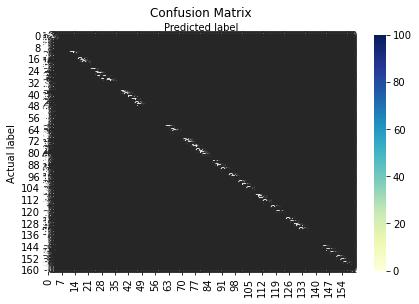

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd

errors_rate = abs(pred_4- y_validation)
conf_max = confusion_matrix(y_validation.argmax(axis = 1), pred_4.argmax(axis = 1))
model4_accuracy = accuracy_score(y_validation, pred_4)
                                 
def plot_confusion_matrix(conf_max):
  class_names = np.array(y_train)
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)

  sns.heatmap(pd.DataFrame(conf_max), annot = True, cmap  ='YlGnBu', fmt='g')
  ax.xaxis.set_label_position("top")

  plt.tight_layout()
  plt.title("Confusion Matrix")
  plt.ylabel("Actual label")
  plt.xlabel("Predicted label")

print ("MODEL 4 PERFORMANCE")
plot_confusion_matrix(conf_max)
print("Confusion Matrix\n\n",conf_max)
print(classification_report(y_validation,pred_4))
print("Accuracy : {:.2%}".format(model4_accuracy))
print ("Error Rate :{:.6f} ".format(np.mean(errors_rate)))

In [ ]:
pred_2 = model2.predict(X_test)

MODEL 4 PERFORMANCE


C:\Users\ee\anaconda3\envs\random_forest\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Confusion Matrix

 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


C:\Users\ee\anaconda3\envs\random_forest\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ee\anaconda3\envs\random_forest\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00       100
          13       0.00      0.00      0.00       100
          14       0.00      0.00      0.00       100
          15       0.00      0.00      0.00       100
          16       0.00      0.00      0.00       100
          17       0.00    

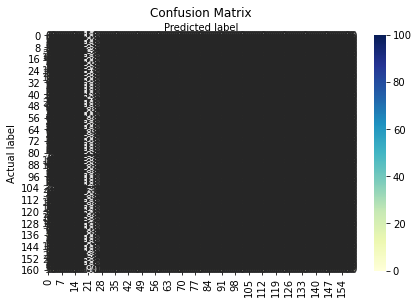

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd

errors_rate = abs(pred_2 - y_test)
conf_max = confusion_matrix(y_test.argmax(axis = 1), pred_2.argmax(axis = 1))
model2_accuracy = accuracy_score(y_test, pred_2)

def plot_confusion_matrix(conf_max):
  class_names = np.array(y_train)
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)

  sns.heatmap(pd.DataFrame(conf_max), annot = True, cmap  ='YlGnBu', fmt='g')
  ax.xaxis.set_label_position("top")

  plt.tight_layout()
  plt.title("Confusion Matrix")
  plt.ylabel("Actual label")
  plt.xlabel("Predicted label")

print ("MODEL 4 PERFORMANCE")
plot_confusion_matrix(conf_max)
print("Confusion Matrix\n\n",conf_max)
print(classification_report(y_test,pred_2))
print("Accuracy : {:.2%}".format(model2_accuracy))
print ("Error Rate :{:.6f} ".format(np.mean(errors_rate)))

In [ ]:
from sklearn.model_selection import validation_curve
train_score, test_score = validation_curve(RandomForestClassifier(), X= X_train, y = y_train, param_name = 'n_estimators', param_range = (100,500) , cv = 3)

In [ ]:
from sklearn.metrics import roc_curve , auc

ax = plt.gca()
rfc_disp = plot_roc_curve(model2, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

roc_auc_score (y_test, model2.predict_proba(X_test)[:,1])